IMPORT REQUIRED LIBRARIES

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

LOAD THE DATASET

In [76]:
df= keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

UNDERSTAND THE DATASET

COMPUTE AND DISPLAY THE NUMBER OF CLASSES

In [77]:
num_classes = len(set(y_train))
print(num_classes)

10


COMPUTE AND DISPLAY THE DIMENSIONS OF EACH IMAGE

In [78]:
train_images.shape

(60000, 28, 28)

In [79]:
test_images.shape

(10000, 28, 28)

DISPLAYING ONE IMAGE FROM EACH CLASS

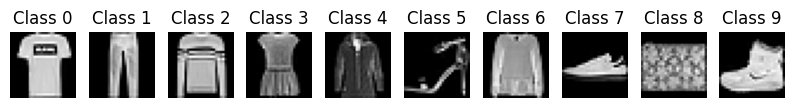

In [80]:
plt.figure(figsize=(10, 10))

# Display one image from each class
for class_index in range(num_classes):
    # Find indices of images belonging to the current class
    class_indices = np.where(train_labels == class_index)[0]

    image_index = class_indices[0]
    image = train_images[image_index]
    
    #plotting
    plt.subplot(1, num_classes, class_index + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Class {class_index}')
    plt.axis('off')

plt.show()

PERFORM NORMALISATION

In [81]:
x_train = x_train/255.0
x_test = x_test/255.0

BUILD FCNN MODEL

In [82]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),)
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))


COMPILE FCNN MODEL

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


FIT THE MODEL AND TRAIN AND TEST THE NETWORK

In [88]:
batch_size = 32  
epochs = 20      

#to keep track of execution time
import datetime
start = datetime.datetime.now()

#to fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3159 - accuracy: 0.0998 - val_loss: 2.3186 - val_accuracy: 0.1055
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3167 - accuracy: 0.1005 - val_loss: 2.3091 - val_accuracy: 0.1008
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3142 - accuracy: 0.1028 - val_loss: 2.3156 - val_accuracy: 0.0925
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3149 - accuracy: 0.0998 - val_loss: 2.3139 - val_accuracy: 0.0985
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3165 - accuracy: 0.0976 - val_loss: 2.3162 - val_accuracy: 0.1027
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3161 - accuracy: 0.0992 - val_loss: 2.3104 - val_accuracy: 0.0942
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3150 - accuracy: 0.1001 - val_loss: 2.3229 - val_accuracy:

PLOT PERFORMANCE CURVES

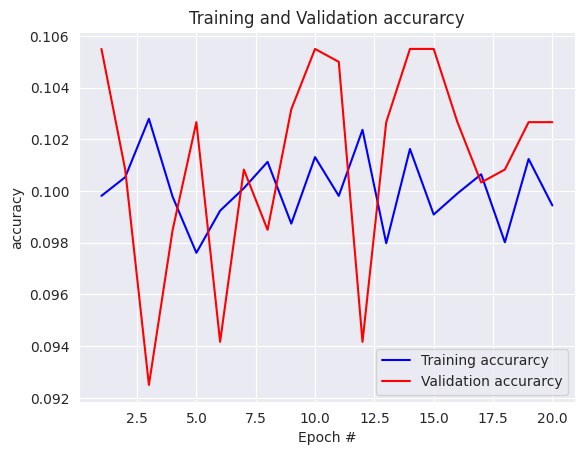

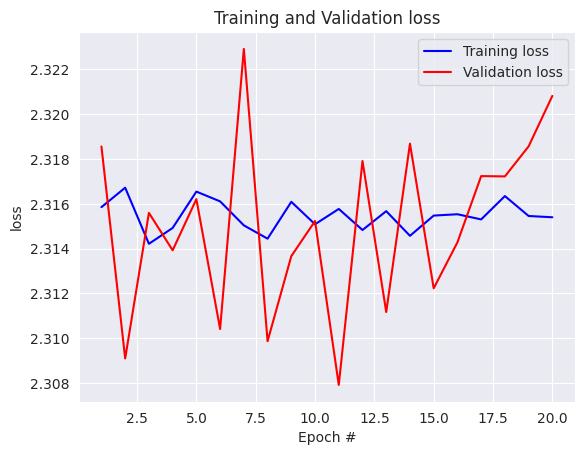

In [90]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


EVALUATE ACCURACY AND LOSS

In [93]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 2.3184 - accuracy: 0.1000
Test Loss: 2.318389892578125
Test Accuracy: 0.10000000149011612


DEFINE CNN MODEL

In [101]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.Input(shape=(x_train.shape[1],28,1)))
model_cnn.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation="relu", padding="valid"))
model_cnn.add(tf.keras.layers.Maxpooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(100,activation="relu"))
model_cnn.add(tf.keras.layers.Dense(10,activation="softmax"))

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Maxpooling2D'